In [1]:
import numpy as np
import pandas as pd
import os
import natsort
import cv2
import matplotlib.cm as cm 

In [ ]:
!

In [20]:
# directory의 file 읽어서 저장하기

path_dir = '/home/gangpaka/catkin_ws/src/VINS-Mono/output/cla_new'
file_list = os.listdir(path_dir)

file_list_img = [file for file in file_list if file.endswith(".png")]
order_list_img = natsort.natsorted(file_list_img)

file_list_dat = [file for file in file_list if file.endswith(".dat")]

print("file_list_img: {}".format(order_list_img))

file_list_img: ['0_image.png', '1_image.png', '2_image.png', '3_image.png', '4_image.png', '5_image.png', '6_image.png', '7_image.png', '8_image.png', '9_image.png', '10_image.png', '11_image.png', '12_image.png', '13_image.png', '14_image.png', '15_image.png', '16_image.png', '17_image.png', '18_image.png', '19_image.png', '20_image.png', '21_image.png', '22_image.png', '23_image.png', '24_image.png', '25_image.png', '26_image.png', '27_image.png', '28_image.png', '29_image.png', '30_image.png', '31_image.png', '32_image.png', '33_image.png', '34_image.png', '35_image.png', '36_image.png', '37_image.png', '38_image.png', '39_image.png', '40_image.png', '41_image.png', '42_image.png', '43_image.png', '44_image.png', '45_image.png', '46_image.png', '47_image.png', '48_image.png', '49_image.png', '50_image.png', '51_image.png', '52_image.png', '53_image.png', '54_image.png', '55_image.png', '56_image.png', '57_image.png', '58_image.png', '59_image.png', '60_image.png', '61_image.png', '6

In [ ]:
print("file_list_img: {}".format(file_list_img))

In [ ]:
print(file_list)

### 두 프레임의 특징점만 띄워보자고 했을 때..
- 1. image frame %d_image.png (order_list_img에서 첫번째, 두번째값 빼오기)
- 2. 같은 index의 %d_mappoints.txt에서 3d point의 id와 2d point의 u,v 값을 가져와서 시각화하기 

In [10]:
# 3.4.2.16 // 3.3.0.10
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16 

  Using cached opencv_python-3.4.2.16-cp36-cp36m-manylinux1_x86_64.whl (25.0 MB)
Reason for being yanked: Release deprecated
  Using cached opencv_contrib_python-3.4.2.16-cp36-cp36m-manylinux1_x86_64.whl (30.6 MB)
Reason for being yanked: Release deprecated


In [21]:
# 임의로 opencv 이용한 시각화를 해보자면,,?

img1 = file_list_img[0]
img2 = file_list_img[1]
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [33]:
detector = cv2.SIFT_create

kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detect(gray2, None)

matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = matcher.match(desc1, desc2)

res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                     flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

cv2.imshow('BFMatcher + SIFT', res)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: 'builtin_function_or_method' object has no attribute 'detectAndCompute'

### SIFT를 이용한 특징점 비교 (예시)
 - 각 코드에 대한 이해가 필요하고, 

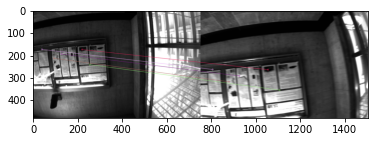

(<matplotlib.image.AxesImage at 0x7ff419107630>, None)

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('cla_new/0_image.png',0)
img2 = cv2.imread('cla_new/8_image.png',0)

# SIFT Descriptor 생성 
sift = cv2.xfeatures2d.SIFT_create()

# Keypoint랑 descriptor를 만들어주는 과정 
# descriptor 계산을 위해 사용된 특징점과 계산된 디스크립터를 같이 반환해줌 
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# 동일한 특징점을 찾아 매칭해주는 내용 
# Brute formce matching을 위한 matcher 생성
bf = cv2.BFMatcher()

# k개의 가장 좋은 매칭 결과를 반환 
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

### FAST + BRIEF (VINS_MONO와 조건이 같음)

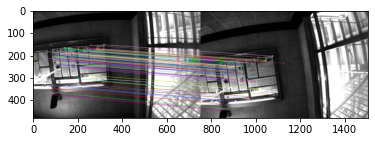

(<matplotlib.image.AxesImage at 0x7f1a804b4860>, None)

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('cla_new/0_image.png',0)
img2 = cv2.imread('cla_new/1_image.png',0)

# VINS_MONO와 마찬가지로 FAST detector // BRIEF descriptor
fast = cv2.FastFeatureDetector_create()
kp1 = fast.detect(img1, None)
kp2 = fast.detect(img2, None)

#BRIEF 없어서 일단 ORB로 이진 형태 확인하려고
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp1, des1 = brief.compute(img1, kp1)
kp2, des2 = brief.compute(img2, kp2)

# 동일한 특징점을 찾아 매칭해주는 내용 
# Brute formce matching을 위한 matcher 생성
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# 사용자가 지정한 k개의 가장 좋은 매칭 결과를 반환 
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
        
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

In [3]:
print(kp1)

[<KeyPoint 0x7f1a84f2e3f0>, <KeyPoint 0x7f1a84f2e360>, <KeyPoint 0x7f1a84f2e390>, <KeyPoint 0x7f1a84f2e3c0>, <KeyPoint 0x7f1a84f2e420>, <KeyPoint 0x7f1a84f2e450>, <KeyPoint 0x7f1a84f2e480>, <KeyPoint 0x7f1a84f2e4b0>, <KeyPoint 0x7f1a84f2e4e0>, <KeyPoint 0x7f1a84f2e510>, <KeyPoint 0x7f1a84f2e540>, <KeyPoint 0x7f1a84f2e570>, <KeyPoint 0x7f1a84f2e5a0>, <KeyPoint 0x7f1a84f2e5d0>, <KeyPoint 0x7f1a84f2e600>, <KeyPoint 0x7f1a84f2e630>, <KeyPoint 0x7f1a84f2e660>, <KeyPoint 0x7f1a84f2e690>, <KeyPoint 0x7f1a84f2e6c0>, <KeyPoint 0x7f1a84f2e6f0>, <KeyPoint 0x7f1a84f2e720>, <KeyPoint 0x7f1a84f2e750>, <KeyPoint 0x7f1a84f2e780>, <KeyPoint 0x7f1a84f2e7b0>, <KeyPoint 0x7f1a84f2e7e0>, <KeyPoint 0x7f1a84f2e810>, <KeyPoint 0x7f1a84f2e840>, <KeyPoint 0x7f1a84f2e870>, <KeyPoint 0x7f1a84f2e8a0>, <KeyPoint 0x7f1a84f2e8d0>, <KeyPoint 0x7f1a84f2e900>, <KeyPoint 0x7f1a84f2e930>, <KeyPoint 0x7f1a84f2e960>, <KeyPoint 0x7f1a84f2e990>, <KeyPoint 0x7f1a84f2e9c0>, <KeyPoint 0x7f1a84f2e9f0>, <KeyPoint 0x7f1a84f2ea20>, 

In [4]:
print(des1)

[[151 186 176 ... 164 121 138]
 [150 250 176 ... 180 121  10]
 [ 43  34  77 ...  28 166 212]
 ...
 [179 121  90 ... 213 213  96]
 [158 253  26 ... 211 223  33]
 [ 57   6  36 ... 232  28 173]]


In [176]:
print(type(des1), type(des1[0]), type(des1[0][0]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.uint8'>


In [180]:
print(des1)

[[151 186 176 ... 164 121 138]
 [150 250 176 ... 180 121  10]
 [ 43  34  77 ...  28 166 212]
 ...
 [179 121  90 ... 213 213  96]
 [158 253  26 ... 211 223  33]
 [ 57   6  36 ... 232  28 173]]


In [27]:
print(len(des1))

2584


In [31]:
type(des1[0])

numpy.ndarray

### kp1 데이터 타입 만들기

In [15]:
import pandas as pd
import os

# file read (keyframes.txt)
cwd = os.getcwd()
file_path1 = os.path.join(cwd, 'cla_new/0_keypoints.txt')
file_path2 = os.path.join(cwd, 'cla_new/8_keypoints.txt')

column_headers = ['x', 'y', 'normal_x', 'normal_y', 'id']

keypoints_1 = pd.read_csv(file_path1, header=None, delimiter=" ", names=column_headers)
keypoints_2 = pd.read_csv(file_path2, header=None, delimiter=" ", names=column_headers)

### Keypoints 1

In [16]:
#custom_kp1 = cv2.KeyPoint()
c_kp1 = []
kp1_xy = ()
list_kp1_xy = list(kp1_xy)

for i in range(len(keypoints_1)):
    c_kp1.append(cv2.KeyPoint())
    list_kp1_xy.append([keypoints_1['x'][i], keypoints_1['y'][i]])
    
#pt = tuple(list_kp1_xy)
pt = list_kp1_xy
#print(pt)
print(type(kp1_xy))
#print(type(custom_kp1.pt))
#---------------------- 여기까지는 c_kp1 모양이 kp1 모양 갖추게 해놓음 -------

print(pt[0][0], pt[0][1])

for i in range(len(keypoints_1)):
    c_kp1[i].pt = tuple(pt[i])

<class 'tuple'>
507.0 3.0


### Keypoints 2

In [17]:
#custom_kp1 = cv2.KeyPoint()
c_kp2 = []
kp2_xy = ()
list_kp2_xy = list(kp2_xy)

for i in range(len(keypoints_2)):
    c_kp2.append(cv2.KeyPoint())
    list_kp2_xy.append([keypoints_2['x'][i], keypoints_2['y'][i]])
    
#pt = tuple(list_kp1_xy)
pt = list_kp2_xy
#print(pt)
print(type(kp2_xy))
#print(type(custom_kp1.pt))
#---------------------- 여기까지는 c_kp1 모양이 kp1 모양 갖추게 해놓음 -------

print(pt[0][0], pt[0][1])

for i in range(len(keypoints_2)):
    c_kp2[i].pt = tuple(pt[i])

<class 'tuple'>
658.0 3.0


In [93]:
print(c_kp1)

[<KeyPoint 0x7f367e8e04e0>, <KeyPoint 0x7f367a0409f0>, <KeyPoint 0x7f367a040a20>, <KeyPoint 0x7f367a0409c0>, <KeyPoint 0x7f367a040ab0>, <KeyPoint 0x7f367a040ae0>, <KeyPoint 0x7f367a040b10>, <KeyPoint 0x7f367a040b40>, <KeyPoint 0x7f367a040b70>, <KeyPoint 0x7f367a040ba0>, <KeyPoint 0x7f367a040bd0>, <KeyPoint 0x7f367a040c00>, <KeyPoint 0x7f367a040c30>, <KeyPoint 0x7f367a040c60>, <KeyPoint 0x7f367a040c90>, <KeyPoint 0x7f367a040cc0>, <KeyPoint 0x7f367a040cf0>, <KeyPoint 0x7f367a040d20>, <KeyPoint 0x7f367a040d50>, <KeyPoint 0x7f367a040d80>, <KeyPoint 0x7f367a040db0>, <KeyPoint 0x7f367a040de0>, <KeyPoint 0x7f367a040e10>, <KeyPoint 0x7f367a040e40>, <KeyPoint 0x7f367a040e70>, <KeyPoint 0x7f367a040ea0>, <KeyPoint 0x7f367a040ed0>, <KeyPoint 0x7f367a040f00>, <KeyPoint 0x7f367a040f30>, <KeyPoint 0x7f367a040f60>, <KeyPoint 0x7f367a040f90>, <KeyPoint 0x7f367a040fc0>, <KeyPoint 0x7f3679f95030>, <KeyPoint 0x7f3679f95060>, <KeyPoint 0x7f3679f95090>, <KeyPoint 0x7f3679f950c0>, <KeyPoint 0x7f3679f950f0>, 

In [6]:
keypoints_1

,x,y,normal_x,normal_y,id
0,507.0,3.0,0.328678,-0.546992,5
1,560.0,3.0,0.469053,-0.564190,14
2,590.0,3.0,0.555143,-0.577166,17
3,598.0,3.0,0.579123,-0.581079,19
4,602.0,3.0,0.591292,-0.583111,20
...,...,...,...,...,...
1441,594.0,475.0,0.574003,0.620760,0
1442,678.0,475.0,0.863049,0.679763,0
1443,681.0,476.0,0.875851,0.686031,0
1444,703.0,476.0,0.967393,0.707848,0


In [34]:
kp1[1].size

2.8175532817840576

### Binary File 해석

In [5]:
def bitToByte(d):
    return int(d, 2).to_bytes(len(d) // 8, byteorder='big')

# 얘는 이용 X
def ByteToInt(d):
    return int.from_bytes(d, "big")

In [6]:
#file read (decriptor.dat)
cwd = os.getcwd()
file_path3 = os.path.join(cwd, 'cla_new/0_briefdes.dat')

#file_path3, 4 두 가지의 버전을 만들어줘야 하고 
with open(file_path3, "rb") as f:
    des1 = []
    while True:
        data = f.readline()
        data = data.strip()
        des1.append(data)
        
        if data==b'':
            break

        data = 0
        
# des에는 keypoints 갯수만큼의 256bit의 binary 값 들어있음
print(des1)

[b'0001010001100000011000000001110010110000100010000011000001001101111100001000111100000010001000001000000000000000000010001111000110001000000000000100000011101000100001001010000000000000011100001011101000001000011000100000001001000010001000101010100001000000', b'0001111000100000001001001001010000010000100010000011001001001101101000001100111001001010010000001000010100100000000010000001000000010010000100111100010000001000110000000010000000001000110101001010000100001001000100110001101101000010000000101010100011000000', b'1001010010000100000111001001000000000000001000000110001100000000110101001011000110010011111000000000001000100000000000000111000000000100100100110001001000100100100000110000100000010000000011010001000100000101011000010101011110000010001001000101010000100110', b'0100101011000100011110001001010000100000001010000000001101010100001000010111101110001000111000000010001000100100000001000100000110001110100000100001001010100100000001110000100000010000011100000011001000000101001000

In [7]:
#des1_np = np.arange(32, dtype=np.uint8)
des1_np = [] 
tmp = []

for i in range(len(des1)-1):
    for j in range(len(des1[i])):
        tmp = des1[i]
        data = bitToByte(tmp)
        #data = ByteToInt(data)
    des1_np.append(data)

#des1_np = np.array(des1_np)
print(des1_np)

[b'\x14``\x1c\xb0\x880M\xf0\x8f\x02 \x80\x00\x08\xf1\x88\x00@\xe8\x84\xa0\x00p\xba\x08b\x02B"\xa8@', b'\x1e $\x94\x10\x882M\xa0\xceJ@\x85 \x08\x10\x12\x13\xc4\x08\xc0 \x08\xd4\xa1\t\x13\x1bB\x02\xa8\xc0', b'\x94\x84\x1c\x90\x00 c\x00\xd4\xb1\x93\xe0\x02 \x00p\x04\x93\x12$\x83\x08\x10\r\x11\x05aW\x82$T&', b'J\xc4x\x94 (\x03T!{\x88\xe0"$\x04A\x8e\x82\x12\xa4\x07\x08\x10p2\x05!p\x80 |(', b'F\xa4p\x0c \x98\x13]\x10g\x82\xa0\x02\x04\x14A\x8c\x82Bl\x86\x88\x00p\xb2\x080r\x00 |\xd8', b'\xc0\xc0\x1c\x08\x00\x18C\x11\x85P\x81\xc0\xa6"\x10`\x10\x13\x86\xec\x03*\x005\x11%pe\x80\x04T\xce', b'\xce @\x88\xa0 RIP3@\x00\x87\x04\x14\xe1\x9e\x11D\xe4\x84\xa8\x00l0(b}@ x\xea', b"\x8e\x04\x14\x08\x80\xa0r\t\xd5\xb1Y`'$\x00\xb0\x14\x93Fe\x83\n\x18m\x11\x05qm\x82&\x04\xe6", b'\x8c \x18\x98\x80\x80P\t\xd0\x05Q`\x07 \x04\xb0@\x11\xc6\xad\xc3\n\x18-\xbd-a\x1d\xa26\x84R', b'\x8c \x0c\x8c\xa0\x88P\t\x90\rP`\x01\x02\x08\xb0@\x93\xc6\xcd\xc0\xaa\x08\xad\xbc\x08`\x1df\x16\xa2V', b"\x88\xa0\x1c\x08\x80\x10@\x11\xc5\

In [139]:
int.from_bytes(des1_np[0], byteorder='big')
#for i in len(des1_np[0]):
  #  int.from_bytes(des1_np[0][i], byteorder='big')

9216537631002839348324412023297895067149797621164605371704157949702673967168

### 왜 안되지... 이거 원소에 접근하면 잘 나오는데, 전체는 아님

In [16]:
print(type(des1_np), type(des1_np[0]), type(des1_np[0][0]))

<class 'list'> <class 'bytes'> <class 'int'>


In [39]:
for i, s in enumerate(str(des1_np[0]).split("\\")):
    print(i, s)

0 b'
1 x14``
2 x1c
3 xb0
4 x880M
5 xf0
6 x8f
7 x02 
8 x80
9 x00
10 x08
11 xf1
12 x88
13 x00@
14 xe8
15 x84
16 xa0
17 x00p
18 xba
19 x08b
20 x02B"
21 xa8@'


In [44]:
list(des1_np[0])

[20,
 96,
 96,
 28,
 176,
 136,
 48,
 77,
 240,
 143,
 2,
 32,
 128,
 0,
 8,
 241,
 136,
 0,
 64,
 232,
 132,
 160,
 0,
 112,
 186,
 8,
 98,
 2,
 66,
 34,
 168,
 64]

In [42]:
str(des1_np[0])

'b\'\\x14``\\x1c\\xb0\\x880M\\xf0\\x8f\\x02 \\x80\\x00\\x08\\xf1\\x88\\x00@\\xe8\\x84\\xa0\\x00p\\xba\\x08b\\x02B"\\xa8@\''

In [41]:
for i in range(len(des1_np[0])):
    print(des1_np[0][i], chr(des1_np[0][i]))

20 
96 `
96 `
28 
176 °
136 
48 0
77 M
240 ð
143 
2 
32  
128 
0  
8 
241 ñ
136 
0  
64 @
232 è
132 
160  
0  
112 p
186 º
8 
98 b
2 
66 B
34 "
168 ¨
64 @


In [11]:
type(des1_np[0][i])

int

In [9]:
for i in range(len(des1_np[0])):
    print(i+1, "th integer :", des1_np[0][i])

1 th integer : 20
2 th integer : 96
3 th integer : 96
4 th integer : 28
5 th integer : 176
6 th integer : 136
7 th integer : 48
8 th integer : 77
9 th integer : 240
10 th integer : 143
11 th integer : 2
12 th integer : 32
13 th integer : 128
14 th integer : 0
15 th integer : 8
16 th integer : 241
17 th integer : 136
18 th integer : 0
19 th integer : 64
20 th integer : 232
21 th integer : 132
22 th integer : 160
23 th integer : 0
24 th integer : 112
25 th integer : 186
26 th integer : 8
27 th integer : 98
28 th integer : 2
29 th integer : 66
30 th integer : 34
31 th integer : 168
32 th integer : 64


In [18]:
file_path4 = os.path.join(cwd, 'cla_new/8_briefdes.dat')

#file_path3, 4 두 가지의 버전을 만들어줘야 하고 
with open(file_path4, "rb") as f:
    des2 = []
    while True:
        data = f.readline()
        data = data.strip()
        des2.append(data)
        
        if data==b'':
            break

        data = 0
        
# des에는 keypoints 갯수만큼의 256bit의 binary 값 들어있음
print(len(des2))

642


In [19]:
#des1_np = np.arange(32, dtype=np.uint8)
des2_np = [] 
tmp = []

for i in range(len(des2)-1):
    for j in range(len(des2[i])):
        tmp = des2[i]
        data = bitToByte(tmp)
        #data = ByteToInt(data)
    des2_np.append(data)

#des1_np = np.array(des1_np)
print(des2_np)

[b'\xcc$(\x90\xa0\x88p\x08\xf0\rX \x81 \x04\xa0\x80\x11\xd4\x0c\xc5(\x08\xed)-c\\B\x04\xa0\x08', b'\x04\xe4l\x04\x00\x08\x12] N\n\xc0\x05 \x04A\n\x00D\x0c\x84\x08\x00\xf0\xab\t\x00ZB\x00\xf8D', b'\x14l`-\x13\x88\x10M\xa2N\x8a\x18P\x02\x01Q\x19\x00A\x1a\xf8\x80\x08\xd0\xbe\n\x08S"\x02\xe8@', b'\xb8\xaa)\x10a\x08p@\xbe\xcdV\x17Y\xa0\xa50\xc3S\xbe\x1d\xed(<\x8d\xad\rk\xdc\xf2V\xe2\x01', b'<:\xa2\xb1\xb8\x8f\xb0X\xe8\x8e`8\x08\x00.\xb5\n\x02R\x9f\x86\xbc\xf1\x90\xac(+\x92f\xfa\xa3\x11', b'\x1cra}\xb9\x8f\xb0M\xa8\xceN]\x94\x10n3: \xc0\x1b\xf6d\xc8\x90\xbe\n\x8a\xd2b\x8b\xa9@', b'\xf8\xaa\x8b\xd0i`p`5\x89v;Y\xc0\xa7\x08\x80s\xbe\x14m)>\x8d,\x0ck\x9c\xf6T\xe2\t', b'\xb8+\x83\xd0b`( \x15\x99t?i\xc0\xab\x08\x85s\xbf\x05i!\x1e\x8f\x08\x0cc\x1cfT\x82#', b'\xb9\x0b\x82\xd2` $ \x15\x99t?s@\xaf\x0c\x85\xd7\xbf\x15m)>\x8d\x08\x04i\x1cjT\x823', b'\xf8\xab\x0b\xd2i```8\xa9w;Y\xc4\xa5\x0c\x84q\xbe\x14m)<\x8d-\x1ck\x9c\xf6T\xe2)', b'\xbc{a,\x99\x8f\x00\xcd\xa8\xceNU\x9c\x92\xba2b\x00\xc4\x1b\xe0d\xc8\x9

In [53]:
print(type(des2_np), type(des2_np[0]), type(des2_np[0][0]))

<class 'list'> <class 'bytes'> <class 'int'>


 - reference code : https://pagedown.tistory.com/6

## VINS Mono Custom Data를 통한 Feature Matching Visualization 

1. Load Input Images, Features, Descriptors 
2. Match Features between two images (find correspondence)
3. Estimate Essential Matrix E with RANSAC 
 - 잘못 매칭된 부분 제거 위해 왼 keypoint -> 오 keypoint로의 변환 행렬 


[ref] https://woochan-autobiography.tistory.com/950

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('cla_new/0_image.png',0)
img2 = cv2.imread('cla_new/8_image.png',0)

''' 위에서 가져오는 값들 - Preprocessing need
kp1 =  
des1 = brief.compute(img1, kp1)
kp2 =  
des2 = brief.compute(img2, kp2)'''

# ---------------------------------------------------------------------

' 위에서 가져오는 값들 - Preprocessing need\nkp1 =  \ndes1 = brief.compute(img1, kp1)\nkp2 =  \ndes2 = brief.compute(img2, kp2)'

In [15]:
np.asarray(des1_np[0][0], np.uint8)

array(20, dtype=uint8)

In [45]:
len(des1_np)

1446

In [21]:
des1_list = []
for i, row in enumerate(des1_np):
    des1_list.append(list(row))
des1_list = np.asarray(des1_list, np.uint8)

In [22]:
des2_list = []
for i, row in enumerate(des2_np):
    des2_list.append(list(row))
des2_list = np.asarray(des2_list, np.uint8)

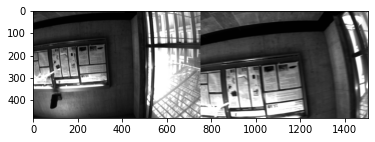

(<matplotlib.image.AxesImage at 0x7ff41bc90438>, None)

In [23]:
# 동일한 특징점을 찾아 매칭해주는 내용 
# Brute formce matching을 위한 matcher 생성
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# 사용자가 지정한 k개의 가장 좋은 매칭 결과를 반환 
#matches = bf.knnMatch(des1_np, des2_np, k=2)
matches = bf.knnMatch(des1_list, des2_list, 2)

good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
        
#img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
img3 = cv2.drawMatchesKnn(img1,c_kp1,img2,c_kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

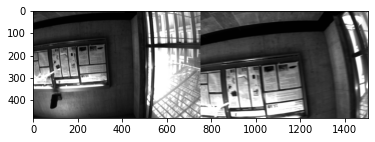

In [24]:
plt.imshow(img3)
plt.savefig("match_0-8.svg")

### Mappoint 사용 
 - 반복되는 코드를 없애는 방법을 생각해보자.. 
 - 코드 깔끔하게 짜는 방법을 모르는 나..

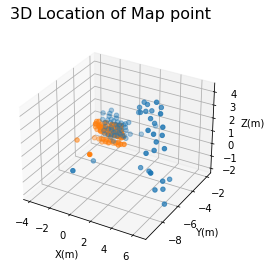

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

cwd = os.getcwd()
file_path5 = os.path.join(cwd, 'cla_new/0_mappoints.txt')
file_path6 = os.path.join(cwd, 'cla_new/15_mappoints.txt')

column_headers = ['x', 'y', 'z', 'u', 'v', 'id', 'len']

mappoints_1 = pd.read_csv(file_path5, header=None, delimiter=" ", names=column_headers)
mappoints_2 = pd.read_csv(file_path6, header=None, delimiter=" ", names=column_headers)

x_1 = mappoints_1['x']
y_1 = mappoints_1['y']
z_1 = mappoints_1['z']

x_2 = mappoints_2['x']
y_2 = mappoints_2['y']
z_2 = mappoints_2['z']

ax.scatter(x_1, y_1, z_1)
ax.scatter(x_2, y_2, z_2)

ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
ax.set_zlabel('Z(m)')
plt.suptitle("3D Location of Map point", fontsize=16)
#plt.savefig("Mappoint.svg")
plt.show()

In [4]:
print(len(mappoints_1['id']))

76


In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('cla_new/0_image.png',0)
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)

img2 = cv2.imread('cla_new/15_image.png',0)
img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

match_img = cv2.hconcat([img1, img2])

#cv2.imshow('imgh', match_img)
# 몇 ms로 할지인데, 인자 0으로 설정하면 무한대기.. 이것도 사용법 찾아봐야할듯

#cv2.waitKey(10000)
#cv2.destroyAllWindows()

In [12]:
print(match_img.shape)
print(img1.shape)

(480, 1504)
(480, 752)


In [8]:
left_coord = ()
right_coord = ()
green = (0, 255, 0)

for i in range(len(mappoints_1['id'])):
    for j in range(len(mappoints_2['id'])):
        #print(i, j)
        if (mappoints_1['id'][i] == mappoints_2['id'][j]):
            #print(i, j)
            
            left_coord = (int(mappoints_1['u'][i]), int(mappoints_1['v'][i]))
            cv2.circle(match_img, left_coord, 1, green)
            
            right_coord = (int(mappoints_2['u'][j]) + 752, int(mappoints_2['v'][j]))
            cv2.circle(match_img, right_coord, 1, green)
            
            cv2.line(match_img, left_coord, right_coord, green, 1, 8, 0)
            
            
#cv2.imshow('imgh', match_img)
cv2.imwrite('match_0-15.png', match_img)


#cv2.waitKey(10000)
#cv2.destroyAllWindows()

True

In [18]:
mappoints_1

,x,y,z,u,v,id,len
0,-0.728499,-3.634101,0.322191,181.930496,224.355209,5,76
1,1.194425,-2.768826,0.096234,511.962036,147.020508,14,76
2,-0.522348,-3.406871,0.493788,209.779739,248.295670,17,76
3,-1.186881,-3.577664,0.508683,122.381706,257.488037,19,76
4,-1.063708,-3.442704,0.098296,121.319733,198.219101,20,76
...,...,...,...,...,...,...,...
71,-0.729536,-3.402976,0.555270,178.938873,262.433533,489,76
72,-2.141741,-3.451924,1.404060,36.779251,392.456116,497,76
73,-0.049680,-3.455253,0.901962,295.108215,300.131592,510,76
74,6.035970,-6.461402,-0.398769,672.358398,105.033905,511,76


### 3D scatter visualization -> plotly 사용

In [27]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 8.3 MB/s eta 0:00:01
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)


In [21]:
plot_mappoint = pd.concat([mappoints_1, mappoints_2])
plot_mappoint['size']=2
plot_mappoint['flag']=''
print(plot_mappoint)

           x         y         z           u           v    id  len  size flag
0  -0.728499 -3.634101  0.322191  181.930496  224.355209     5   76     2     
1   1.194425 -2.768826  0.096234  511.962036  147.020508    14   76     2     
2  -0.522348 -3.406871  0.493788  209.779739  248.295670    17   76     2     
3  -1.186881 -3.577664  0.508683  122.381706  257.488037    19   76     2     
4  -1.063708 -3.442704  0.098296  121.319733  198.219101    20   76     2     
..       ...       ...       ...         ...         ...   ...  ...   ...  ...
89 -3.877818 -4.620657 -0.531481   65.649460  257.585175  1416   94     2     
90 -2.360584 -3.521617  0.076108  136.699280  316.958984  1420   94     2     
91 -0.641855 -3.570568  0.214931  568.770691  299.158142  1421   94     2     
92 -1.025497 -3.657023  0.840731  484.661316  473.101410  1424   94     2     
93 -2.511482 -3.530159  0.364205  116.443428  384.586517  1425   94     2     

[170 rows x 9 columns]


In [35]:
plot_mappoint.duplicated('id')

#print(plot_mappoint['id'].nunique())
#print(plot_mappoint['id'].value_counts())
print(plot_mappoint['id'].duplicated(keep = False).sum())
plot_mappoint['flag'][plot_mappoint['id'].duplicated(keep = False)] = 'overlap'

28


/home/gangpaka/anaconda3/envs/vins_match_vis/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
not_overlap = plot_mappoint['flag'] != 'overlap'

In [24]:
# 빈 데이터 프레임 생성

mappoint_df = pd.DataFrame(columns=['x', 'y', 'z', 'u', 'v', 'id', 'size', 'flag'])
cnt = 0

for i in range(len(mappoints_1['id'])):
    for j in range(len(mappoints_2['id'])):
        #print(i, j) -> i, j 기억해주는 인덱스 있으면 좋을 것 같구..
        if (mappoints_1['id'][i] == mappoints_2['id'][j]):
            mappoint_df['x'][cnt] = (mappoints_1['x'][i] + mappoints_2['x'][j])/2
            mappoint_df['y'][cnt] = (mappoints_1['y'][i] + mappoints_2['y'][j])/2
            mappoint_df['z'][cnt] = (mappoints_1['z'][i] + mappoints_2['z'][j])/2
            mappoint_df['id'][cnt] = mappoints_1['id'][i]
            mappoint_df['flag'][cnt] = 'overlap'
            cnt = cnt + 1

print(mappoint_df)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
mappoint_df

,x,y,z,u,v,id,size,flag


In [20]:
import plotly.express as px

#len이 categorical data가 아니라서.. 변환해주는게 나을지도 => 일단은 쓰자 
fig = px.scatter_3d(plot_mappoint, x='x', y='y', z='z', color='len', size='size')
fig.show()

In [ ]:
import plotly.graph_objs as go
import numpy as np

In [ ]:
# 해리스 코너 검출 (corner_harris.py) - reference

import cv2
import numpy as np

img = cv2.imread('cla_new/0_image.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해리스 코너 검출 ---①
corner = cv2.cornerHarris(gray, 2, 3, 0.04)
# 변화량 결과의 최대값 10% 이상의 좌표 구하기 ---②
coord = np.where(corner > 0.1* corner.max())
coord = np.stack((coord[1], coord[0]), axis=-1)

# 코너 좌표에 동그라미 그리기 ---③ <- 이 부분 이용하면 될 듯함 
for x, y in coord:
    cv2.circle(img, (x,y), 5, (0,0,255), 1, cv2.LINE_AA)

# 변화량을 영상으로 표현하기 위해서 0~255로 정규화 ---④
corner_norm = cv2.normalize(corner, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# 화면에 출력
corner_norm = cv2.cvtColor(corner_norm, cv2.COLOR_GRAY2BGR)
merged = np.hstack((corner_norm, img))
cv2.imshow('Harris Corner', merged)
cv2.waitKey()
cv2.destroyAllWindows()